In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sns
import matplotlib.pyplot as plt

#plotly
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
init_notebook_mode(connected=True)
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['globalterrorismdb_0718dist.csv']


## Load the data

In [2]:
df = pd.read_csv('../input/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



Here I am using 'ISO-8859-1' encoding to load the dataset beacuse 'utf-8' codec can't decode byte 0xe9 in position 18'

## Some insights and basic statistics about the dataset

In [3]:
df.head()  #gives us top 5 rows of the dataframe

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [5]:
df.isnull().count()

eventid               181691
iyear                 181691
imonth                181691
iday                  181691
approxdate            181691
extended              181691
resolution            181691
country               181691
country_txt           181691
region                181691
region_txt            181691
provstate             181691
city                  181691
latitude              181691
longitude             181691
specificity           181691
vicinity              181691
location              181691
summary               181691
crit1                 181691
crit2                 181691
crit3                 181691
doubtterr             181691
alternative           181691
alternative_txt       181691
multiple              181691
success               181691
suicide               181691
attacktype1           181691
attacktype1_txt       181691
                       ...  
propextent            181691
propextent_txt        181691
propvalue             181691
propcomment   

## Finding missing values

In [6]:
df.isnull().sum() #gives us total no. of missing values for all the columns

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

**Let us create dataframe to store the information about missing values for future reference**

In [7]:
totalms = df.isnull().sum().sort_values(ascending=False)
percentagems = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending=False)
missingdata = pd.concat([totalms, percentagems], axis=1, keys=['Total', 'Percentage'])
missingdata.head()

,Total,Percentage
gsubname3,181671,0.999890
weapsubtype4_txt,181621,0.999615
weapsubtype4,181621,0.999615
weaptype4,181618,0.999598
weaptype4_txt,181618,0.999598


In [8]:
print(df.shape)

(181691, 135)


In [9]:
print(missingdata.shape)

(135, 2)


In [10]:
print(missingdata)

                   Total  Percentage
gsubname3         181671    0.999890
weapsubtype4_txt  181621    0.999615
weapsubtype4      181621    0.999615
weaptype4         181618    0.999598
weaptype4_txt     181618    0.999598
claimmode3        181558    0.999268
claimmode3_txt    181558    0.999268
gsubname2         181531    0.999119
claim3            181373    0.998250
guncertain3       181371    0.998239
gname3            181367    0.998217
divert            181367    0.998217
attacktype3       181263    0.997644
attacktype3_txt   181263    0.997644
ransomnote        181177    0.997171
ransompaidus      181139    0.996962
ransomamtus       181128    0.996901
claimmode2        181075    0.996610
claimmode2_txt    181075    0.996610
ransompaid        180917    0.995740
corp3             180665    0.994353
targsubtype3      180594    0.993962
targsubtype3_txt  180594    0.993962
natlty3           180544    0.993687
natlty3_txt       180544    0.993687
target3           180516    0.993533
t

**From this we can drop the columns with high percentage of missing values. But as off now I am not dropping those columns from df(main dataframe)**

## Univariate analysis/visualization

**Let start from the left most column.** 

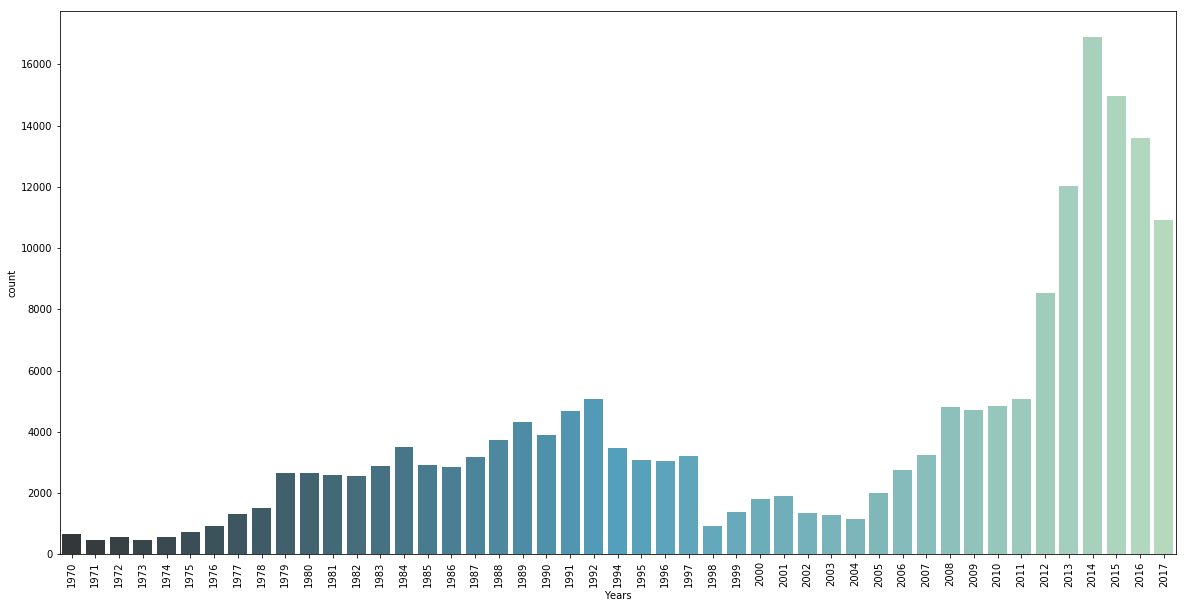

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='iyear', palette='GnBu_d', data=df, orient="v")
_ = plt.xlabel('Years')
_ = plt.setp(ax.get_xticklabels(), rotation = 90)

Here we can see year wise terrorist attacks starting from 1970 till 2017. Number of attacks were steadily increasing till 1992 and there was sudden drop from 1994 to 2004. Year 2014 witnessed the highest no. of attacks. 

In [12]:
df['country_txt'].value_counts()

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


**Let us see how each country suffered**

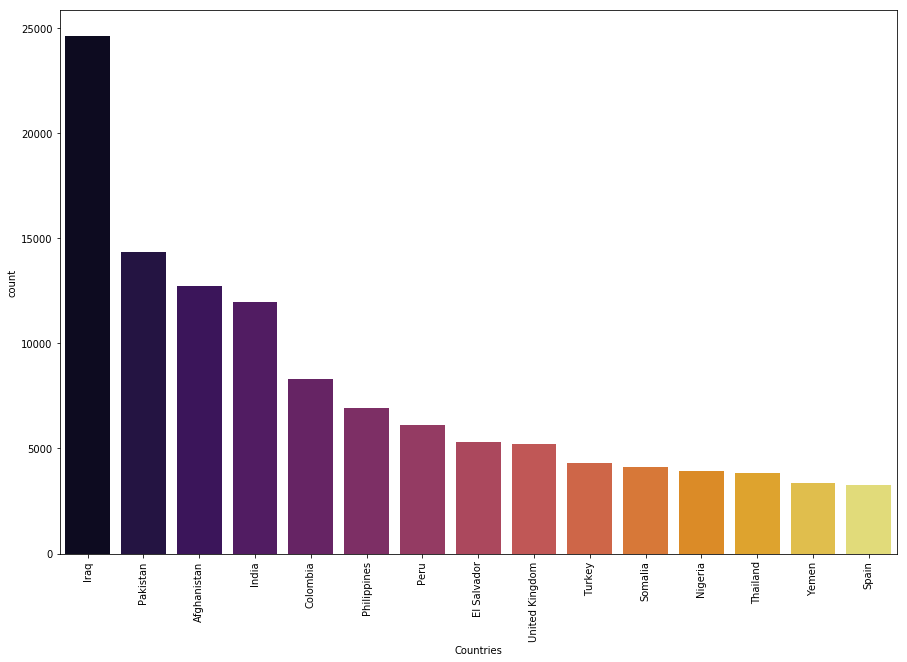

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='country_txt', data=df, order=df['country_txt'].value_counts()[:15].index, palette='inferno')
_ = plt.xlabel('Countries')
_ = plt.setp(ax.get_xticklabels(), rotation = 90)

**Displaying to 15 countries most affected by terror attacks. Iraq suffered the most among all the countries followed by Pakistan, Afganistan & India. From this we can conclude that south, east Asia is high affected region.** 

**The dataset is divided into the following regions**

In [14]:
df['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [15]:
df['region_txt'].isna().sum()

0

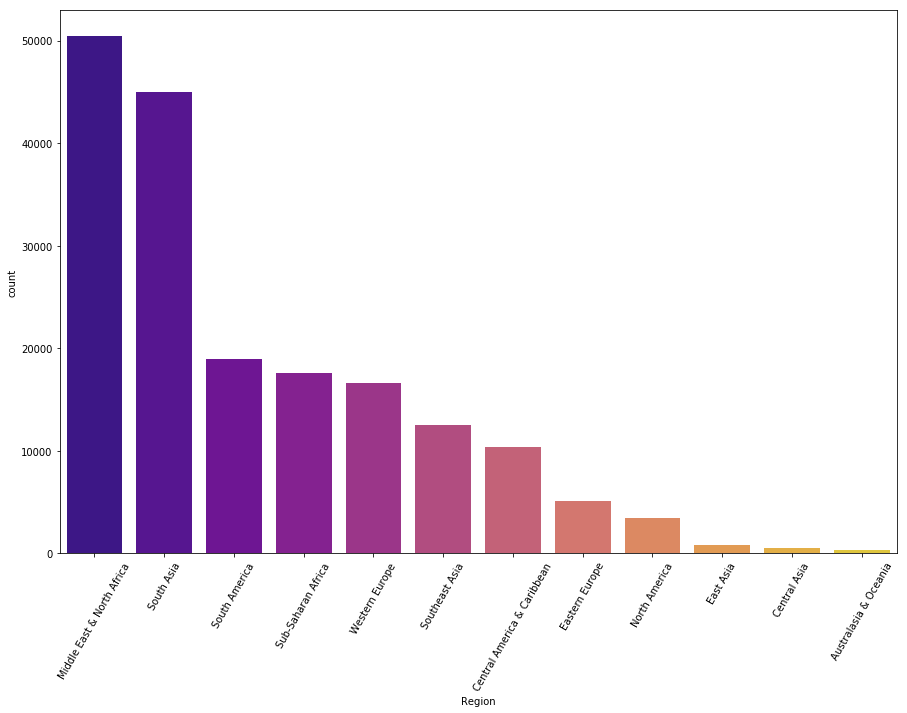

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='region_txt', data=df, palette='plasma', order=df['region_txt'].value_counts().index)
_ = plt.xlabel('Region')
_ = plt.setp(ax.get_xticklabels(), rotation = 60)

**Middle east and north africa together suffered as nearly as south asia**

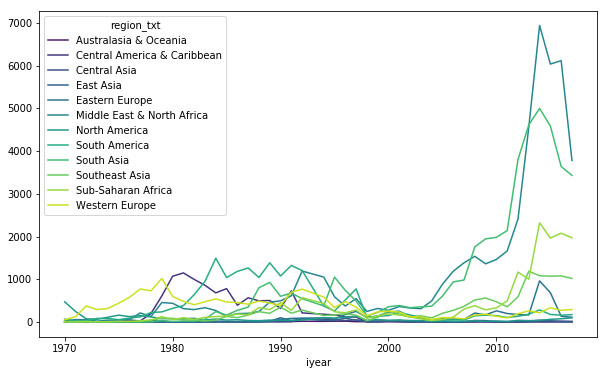

In [17]:
terror_region = pd.crosstab(df['iyear'], df['region_txt'])
terror_region.plot(color=sns.color_palette('viridis', 12))
fig = plt.gcf()
fig.set_size_inches(10,6)
#use plotly

Here we can see the trend in attacks over the years over different regions. We can see the spike in dark green line which represents middle east and north africa region, suffered most during the last decade followed by south asia. 

In [18]:
print(terror_region.head())

region_txt  Australasia & Oceania       ...        Western Europe
iyear                                   ...                      
1970                            1       ...                    50
1971                            1       ...                   125
1972                            8       ...                   376
1973                            1       ...                   290
1974                            1       ...                   317

[5 rows x 12 columns]


**Successful attacks**

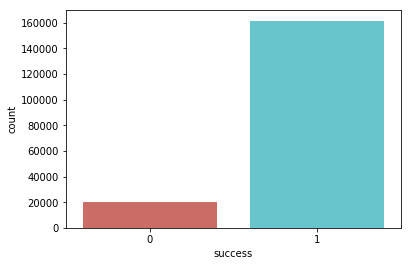

In [19]:
sns.countplot(x='success', data=df, palette='hls')

Here 1 represents succesful attack and 0 represents failes attempt. From the above figure we can see that most of the attacks are successful.

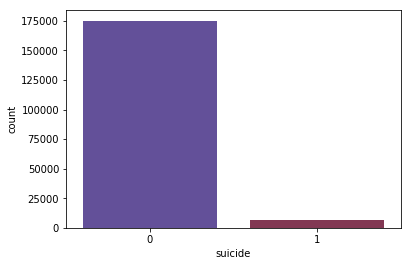

In [20]:
sns.countplot(x='suicide', data=df, palette='twilight')

In [21]:
df['attacktype1_txt'].isnull().sum()

0

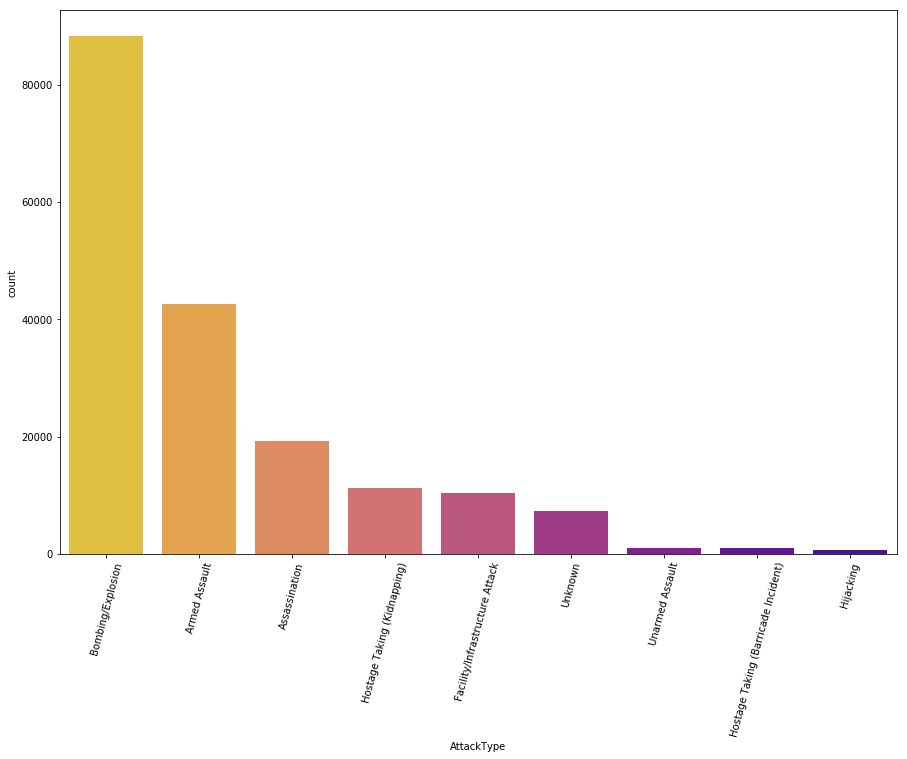

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='attacktype1_txt', data=df, palette='plasma_r', order=df['attacktype1_txt'].value_counts().index)
_ = plt.xlabel('AttackType')
_ = plt.setp(ax.get_xticklabels(), rotation = 75)

So, most of the attacks are bombing/explosion as it has highest range among all options, with equally high damaging. 

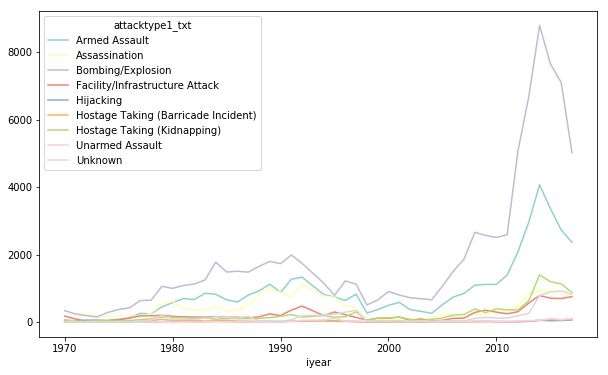

In [23]:
terror_attack = pd.crosstab(df['iyear'], df['attacktype1_txt'])
terror_attack.plot(color = sns.color_palette('Set3', 9))
fig = plt.gcf()
fig.set_size_inches(10, 6)

   We can see from the above figure that bombing/explosion is the go to method for terror attacks over the years followed by armed assualt. 

In [24]:
df['attacktype2_txt'].value_counts()

Armed Assault                          3434
Facility/Infrastructure Attack         1653
Bombing/Explosion                       506
Hostage Taking (Kidnapping)             479
Assassination                           162
Hostage Taking (Barricade Incident)      37
Unarmed Assault                          30
Hijacking                                10
Unknown                                   3
Name: attacktype2_txt, dtype: int64

In [25]:
df['attacktype3_txt'].value_counts()

Facility/Infrastructure Attack         229
Armed Assault                          119
Hostage Taking (Kidnapping)             53
Bombing/Explosion                       16
Hijacking                                4
Assassination                            4
Hostage Taking (Barricade Incident)      2
Unarmed Assault                          1
Name: attacktype3_txt, dtype: int64

In [26]:
df['attacktype1_txt'].isna().sum()

0

In [27]:
percentage_missing = (df['attacktype2_txt'].isna().sum() / df['attacktype2_txt'].isna().count()) * 100.00
print(percentage_missing)

96.52486914596761


In [28]:
percentage_missing2 = (df['attacktype3_txt'].isna().sum() / df['attacktype3_txt'].isna().count()) * 100.00
print(percentage_missing2)

99.7644352224381


    attacktype2 & attacktype3 is not defined properly, at the same time both of these attributes hold high percentage of missing values.

In [29]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

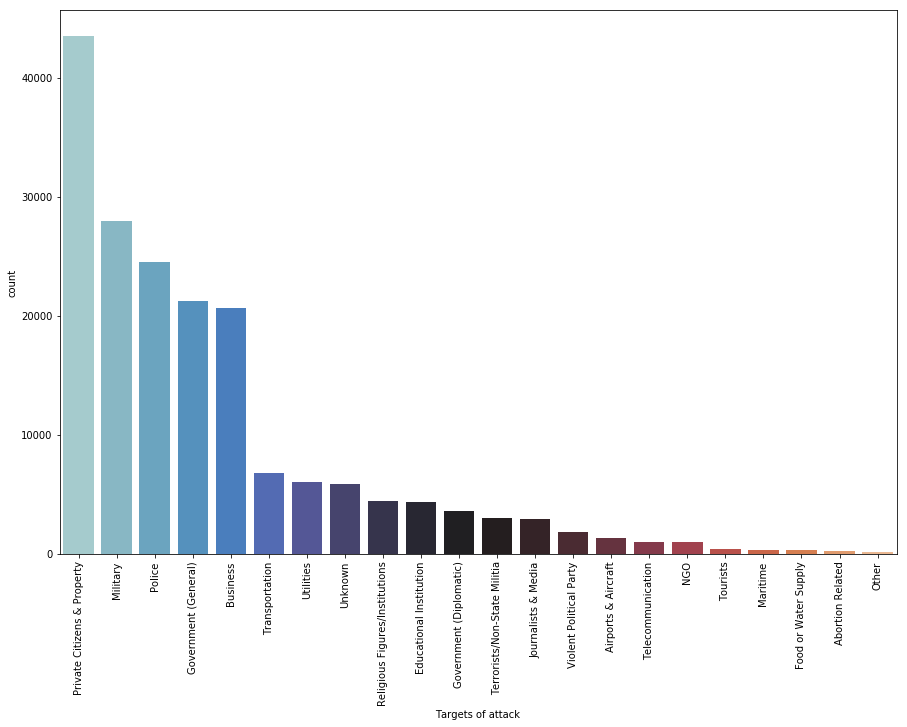

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = 'targtype1_txt', data=df, palette='icefire', order=df['targtype1_txt'].value_counts().index)
_ = plt.xlabel('Targets of attack')
_ = plt.setp(ax.get_xticklabels(), rotation = 90)

From the above figure we can see that private citizens and property is the highest target and the top five targets are private citizens and property, military, police, government(general) where people can be found in high numbers and also law & order is affected.  

In [31]:
df['weaptype1_txt'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [32]:
df['weaptype1_txt'].isna().sum()

0

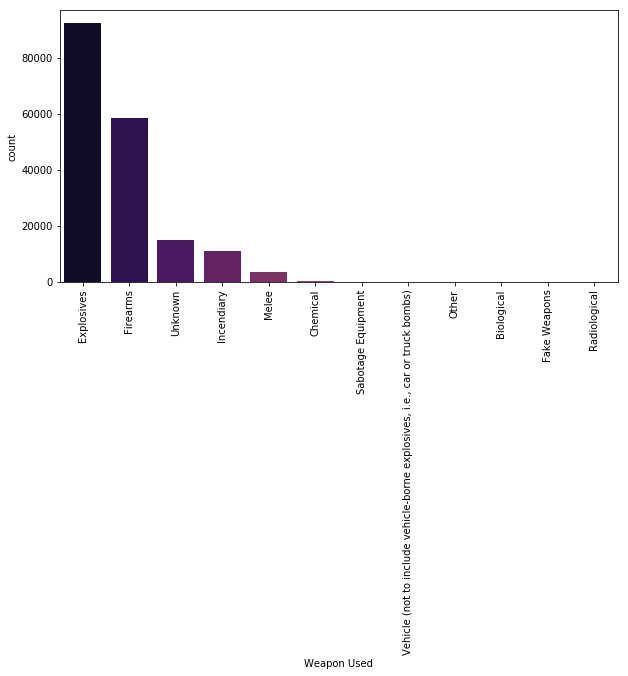

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='weaptype1_txt', data=df, palette='inferno', order=df['weaptype1_txt'].value_counts().index)
_ = plt.xlabel('Weapon Used')
_ = plt.setp(ax.get_xticklabels(), rotation = 90)

As we have already seen that bombing is the goto method for attacks explosives are 1st choice of weapon.

In [34]:
df['gname'].value_counts()[0:1]

Unknown    82782
Name: gname, dtype: int64

**Here gname is terrorist group name**.  Here we can see that unknown group/groups has/have caused the highest damage. There can be indivisuals, small unorganized group, separatist etc under this "unknow group" umbrella or known groups but didn't claim the attack.

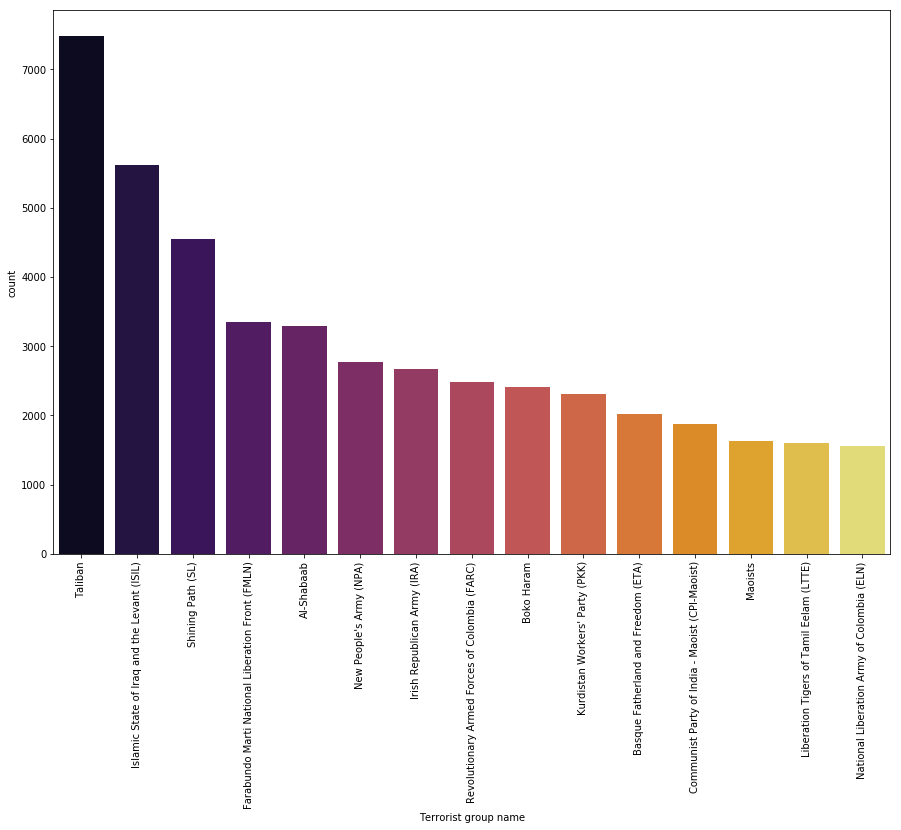

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x='gname', data=df, palette='inferno', order=df['gname'].value_counts()[1:16].index)
_ = plt.xlabel('Terrorist group name')
_ = plt.setp(ax.get_xticklabels(), rotation=90) 

**Here we can see the top 15 terrerist groups excluding the highest unknown **

## Bivariate analysis/visualization

In [36]:
df['casualities'] = df['nkill'] + df['nwound']

In [37]:
df_country_cas = pd.concat([df['country_txt'], df['casualities']], axis=1)
df3 = pd.DataFrame(df_country_cas.groupby('country_txt').sum().reset_index())
df3.head()

,country_txt,casualities
0,Afghanistan,80213.0
1,Albania,168.0
2,Algeria,19296.0
3,Andorra,0.0
4,Angola,4874.0


In [38]:
print(df3.shape)

(205, 2)


In [39]:
x = df3['country_txt']
y = df3['casualities']
sz = 10
colors = np.random.randn(205)
fig = go.Figure()
fig.add_scatter(
    x = x,
    y = y, 
    mode = 'markers',
    marker={
        'size':sz,
        'color':colors,
        'opacity':0.6,
        'colorscale':'Viridis'
    });
iplot(fig)

In [40]:
missingdata.loc['nkill', :]

Total         10313.000000
Percentage        0.056761
Name: nkill, dtype: float64

In [41]:
missingdata.loc['nwound', :]

Total         16311.000000
Percentage        0.089773
Name: nwound, dtype: float64

In [42]:
df_year_kill = pd.concat([df['iyear'], df['nkill']], axis=1)

In [43]:
df2 = pd.DataFrame(df_year_kill.groupby('iyear').sum().reset_index())
df2.head()

,iyear,nkill
0,1970,174.0
1,1971,173.0
2,1972,566.0
3,1973,370.0
4,1974,539.0


In [44]:
print(df2.shape)

(47, 2)


In [45]:
df_year_wound = pd.concat([df['iyear'], df['nwound']], axis=1)
df3 = pd.DataFrame(df_year_wound.groupby('iyear').sum().reset_index())
df3.head()

,iyear,nwound
0,1970,212.0
1,1971,82.0
2,1972,409.0
3,1973,495.0
4,1974,865.0


In [46]:

x = df2['iyear']
y = df2['nkill']
colors = np.random.randn(47)
sz = 15
fig = go.Figure()
fig.add_scatter(
    x = x, 
    y = y, 
    mode = 'markers', 
    marker = {
        'size':sz,
        'color':colors,
        'opacity':0.6,
        'colorscale':'Viridis'
    });
iplot(fig)

The figure above demonstrates total no. of people killed each year due to terror attacks from 1970 to 2017   

In [47]:
x1 = df3['iyear']
y1 = df3['nwound']
colors = np.random.randn(47)
sz = 15
fig = go.Figure()
fig.add_scatter(
    x = x1, 
    y = y1, 
    mode = 'markers',
    marker = {
        'size':sz,
        'color':colors,
        'opacity':0.6,
        'colorscale':'Viridis'
    });
iplot(fig)

The figure above demonstrates total no. of people wounded each year due to terror attacks from 1970 to 2017.